In [49]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [50]:
N,K=sp.symbols('N K', real=True, positive=True)

In [51]:
# produktfunksjon
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

In [52]:
# likning 1, mtsb
df_K=sp.diff(x(N,K),K)
df_N=sp.diff(x(N,K),N)
mtsb=df_N/df_K
display(mtsb)

1.0*K**1.0/N**1.0

In [53]:
prod=x(N,K).subs(K, 350*N/500)
display(prod)

0.836660026534076*N**1.0

In [54]:
# finn optimal verdi på N
opt_N = sp.solve(prod-10, N)
display(opt_N)

[11.9522860933439]

In [55]:
X=sp.symbols('X', positive=True, real=True)
løsn_X=sp.solve([x(N,K)-X, K-(350/500)*N], K,N)
løsn_X

[(0.836660026534076*X, 1.19522860933439*X)]

In [56]:
def C_X(X):
    return 500*0.8367*X+350*1.1952*X
C_X(X)

836.67*X

In [57]:
# Definer isokvanter
iso_X=sp.solve(x(N,K)-X,K)[0]
iso_X

X**2/N

In [58]:
iso_fn=sp.lambdify(
    (X,N), 
    iso_X
)
iso_fn(X,N)

X**2/N

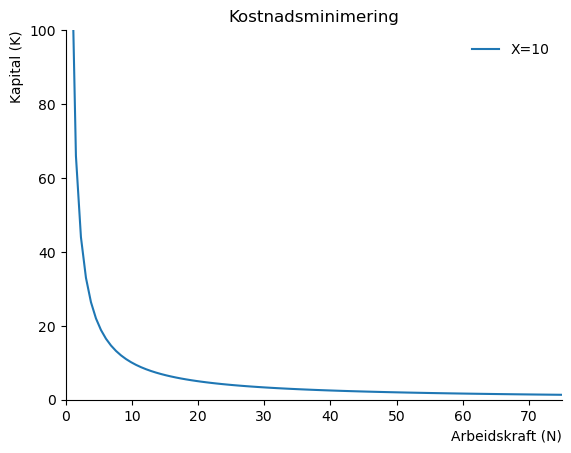

In [59]:
# tegne isokvanten for X=10

n=np.linspace(0.001,75, 100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kapital (K)', loc='top')
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(0,75))
ax.set(ylim=(0,100))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n,iso_fn(10,n), label='X=10')

# tittel
ax.set_title('Kostnadsminimering')

#vis navnene:
ax.legend(loc='best',frameon=False);

In [60]:
# Sett inn i uttrykket for isokost
def isokost(X,N):
    return C_X(X)/500 -(350/500)*N
isokost(X,N)

-0.7*N + 1.67334*X

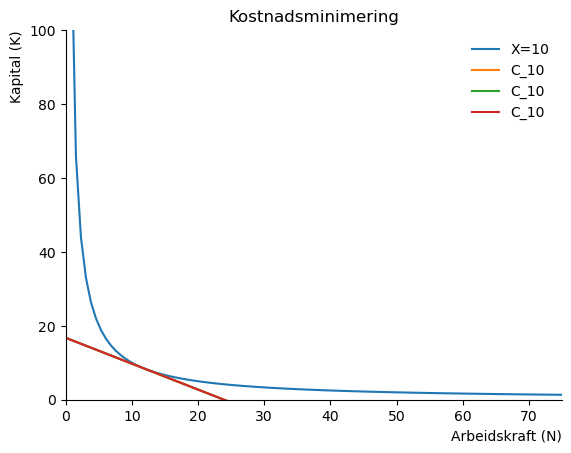

In [63]:
ax.plot(n, isokost(10,n), label='C_10')
ax.legend(loc='best',frameon=False)
fig1

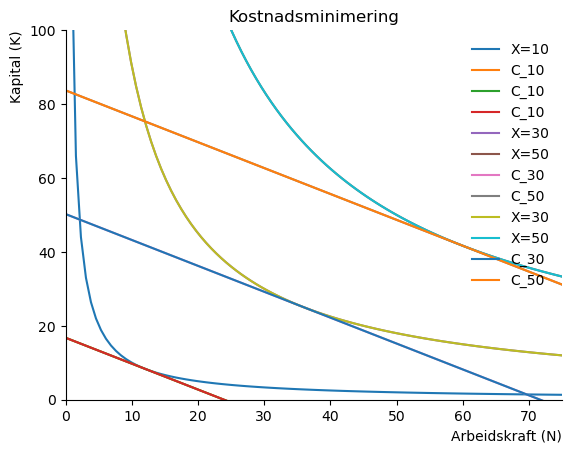

In [65]:
# sett inn isokvanter for X=30 og X=50, samt minkost for disse

ax.plot(n,iso_fn(30,n), label='X=30')
ax.plot(n,iso_fn(50,n), label='X=50')

ax.plot(n, isokost(30,n), label='C_30')
ax.plot(n, isokost(50,n), label='C_50')

ax.legend(loc='best',frameon=False)

fig1

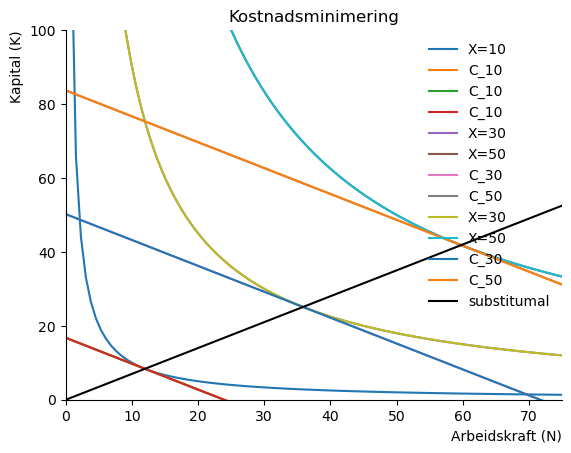

In [66]:
def substitumal(w,r,N):
    return N*w/r
ax.plot(n,substitumal(350,500,n),  color='black', label='substitumal')
ax.legend(loc='best',frameon=False)
fig1

In [69]:
def C_X2(X):
    return (10000 + C_X(X))/X

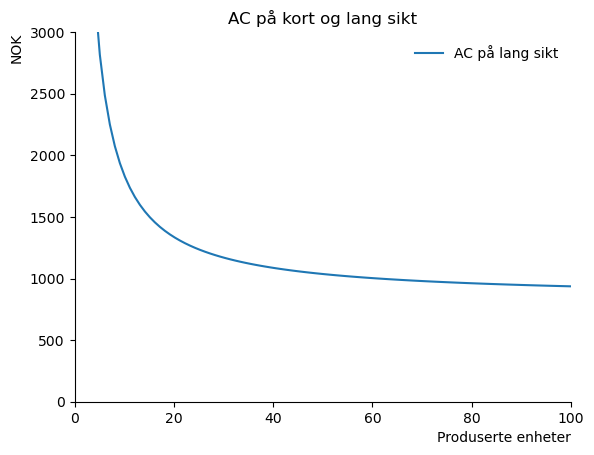

In [70]:
x_num=np.linspace(0.001,100, 100)

fig2, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top')
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

ax.plot(x_num,C_X2(x_num), label='AC på lang sikt')

# tittel
ax.set_title('AC på kort og lang sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);


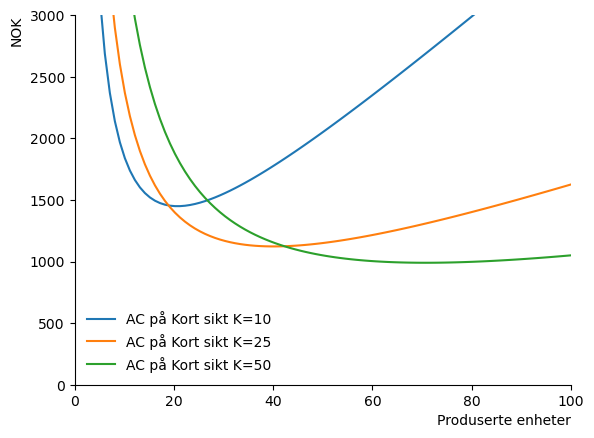

In [48]:
# skriv ditt svar her

def C_s(K,X):
    return (10000 + 500*K + (350*X**2) / K) / X

ax.plot(x_num,C_s(10,x_num), label='AC på Kort sikt K=10')
ax.plot(x_num,C_s(25,x_num), label='AC på Kort sikt K=25')
ax.plot(x_num,C_s(50,x_num), label='AC på Kort sikt K=50')
ax.legend(loc='best',frameon=False)
fig2